In [1]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2022-05-01 08:26:03--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz [following]
--2022-05-01 08:26:04--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  11.5MB/s    in 31s     

2022-05-01 08:26:36 (10.5 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2022-05-01 08:26:40--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.

In [2]:
import scipy.io
img_labels = scipy.io.loadmat("imagelabels.mat")
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

In [3]:
import os
import random
import numpy as np
import cv2 as cv2
images = list()
labels = list()
dir = "jpg/"
for imgs in os.listdir(dir):
  img_num = int(imgs[7:11])-1
  labels.append(img_labels[img_num])
  image = cv2.imread(os.path.join(dir, imgs))
  resized = cv2.resize(image, (100,100))
  images.append(resized)


In [4]:
for i in range(0,len(labels)):
  labels[i]=int(labels[i])

In [5]:
from collections import Counter
new_label = Counter(labels)
ind = list()
for i in range(len(new_label)):
  if(new_label[i]>=100):
    ind.append(i)

In [6]:
len(ind)

23

In [7]:
IMG = list()
LAB = list()
i=0
while(i<102):
  # extracting data of each class separately
  l=list()
  p=list()
  for j in range(0,len(labels)):
    if(labels[j]==i):
      l.append(images[j])
      p.append(labels[j])
  IMG.append(l)
  LAB.append(p)
  i+=1


In [8]:
lab=list()
c_ind=0
p=0
for i in ind:
  c_ind+=1
  for j in LAB[i]:
    lab.append(p)
  p+=1
img1=list()
c_ind=0
for i in ind:
  c_ind+=1
  for j in  IMG[i]:
    img1.append(j)

In [9]:
Counter(lab)

Counter({0: 108,
         1: 127,
         2: 130,
         3: 196,
         4: 258,
         5: 109,
         6: 114,
         7: 109,
         8: 102,
         9: 194,
         10: 171,
         11: 120,
         12: 107,
         13: 251,
         14: 137,
         15: 105,
         16: 166,
         17: 112,
         18: 131,
         19: 154,
         20: 184,
         21: 162,
         22: 128})

In [10]:
np.asarray(img1).shape

(3375, 100, 100, 3)

In [11]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets,layers,models 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
img1 = np.array(img1, dtype="float32")

In [13]:
(trainX_temp, testX, trainY_temp, testY) = train_test_split(img1, lab,
	test_size=0.20, stratify=lab, random_state=1)

In [14]:
(trainX, valX, trainY, valY) = train_test_split(trainX_temp, trainY_temp,
	test_size=0.20, stratify=trainY_temp, random_state=1)

In [15]:
(trainX.shape)

(2160, 100, 100, 3)

In [16]:
trainX=np.array(trainX).reshape([-1, 100, 100, 3]) 

In [17]:
valX=np.array(valX).reshape([-1, 100, 100, 3]) 

In [18]:
testX.shape

(675, 100, 100, 3)

In [19]:
from keras.utils import np_utils

valY=np.asarray(valY)     
valY = np_utils.to_categorical(valY)

trainY=np.asarray(trainY)    
trainY = np_utils.to_categorical(trainY)

testY=np.asarray(testY)  
testY= np_utils.to_categorical(testY)

In [20]:
valX.shape

(540, 100, 100, 3)

In [21]:
valY.shape

(540, 23)

In [22]:
testY.shape

(675, 23)

In [23]:
trainY.shape

(2160, 23)

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from pathlib import  Path
import cv2
import pandas as pd
import numpy as np
from PIL import Image 
import os, os.path
from keras.utils import np_utils
import imagesize
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense

In [ ]:
complex_cnn_model=Sequential()

complex_cnn_model.add(Conv2D(100,(3,3),activation='relu',input_shape=(100,100,3,))) #adding convolution layer 1
complex_cnn_model.add(MaxPool2D(2,2))                                             #adding pooling layer 

complex_cnn_model.add(Conv2D(100,(3,3),activation='relu'))                         #adding convolution layer 2
complex_cnn_model.add(MaxPool2D(2,2))                                             #adding pooling layer

complex_cnn_model.add(Conv2D(100,(3,3),activation='relu'))                         #adding convolution layer 3
complex_cnn_model.add(MaxPool2D(2,2))                                             #adding pooling layer
 
complex_cnn_model.add(Flatten())                                                  #adding FC layer 1
complex_cnn_model.add(Dense(90,activation='relu'))

complex_cnn_model.add(Flatten())                                                  #adding FC layer 2                                             
complex_cnn_model.add(Dense(80,activation='relu'))

complex_cnn_model.add(Flatten())                                                  #adding FC layer 3
complex_cnn_model.add(Dense(70,activation='relu'))

complex_cnn_model.add(Dense(23,activation='softmax'))                             #adding output layer

opt = keras.optimizers.Adam(learning_rate=0.0001)                                 #compiling the model
complex_cnn_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

#fitting the cnn_model
complex_history=complex_cnn_model.fit(trainX,trainY,epochs=50,batch_size=30,validation_split=0.2)

Epoch 1/50
58/58 [==============================] - 37s 625ms/step - loss: 4.3922 - accuracy: 0.0723 - val_loss: 3.1113 - val_accuracy: 0.1366
Epoch 2/50
58/58 [==============================] - 36s 622ms/step - loss: 2.8972 - accuracy: 0.1667 - val_loss: 2.9205 - val_accuracy: 0.1620
Epoch 3/50
58/58 [==============================] - 36s 622ms/step - loss: 2.6579 - accuracy: 0.2188 - val_loss: 2.7568 - val_accuracy: 0.2199
Epoch 4/50
58/58 [==============================] - 36s 625ms/step - loss: 2.4340 - accuracy: 0.2766 - val_loss: 2.5678 - val_accuracy: 0.2454
Epoch 5/50
58/58 [==============================] - 36s 627ms/step - loss: 2.2132 - accuracy: 0.3397 - val_loss: 2.4499 - val_accuracy: 0.3056
Epoch 6/50
58/58 [==============================] - 36s 626ms/step - loss: 1.9307 - accuracy: 0.4132 - val_loss: 2.4966 - val_accuracy: 0.2685
Epoch 7/50
58/58 [==============================] - 36s 630ms/step - loss: 1.7077 - accuracy: 0.4988 - val_loss: 2.3218 - val_accuracy: 0.3449

In [26]:
predLabels = complex_cnn_model.predict(testX, batch_size=32)
predLabels = np.argmax(predLabels, axis=1)
print(classification_report(testY.argmax(axis=1), predLabels))

NameError: ignored

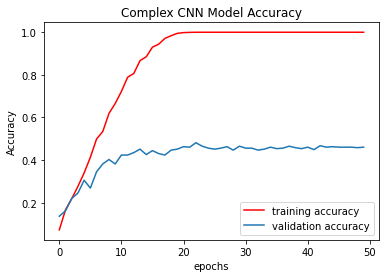

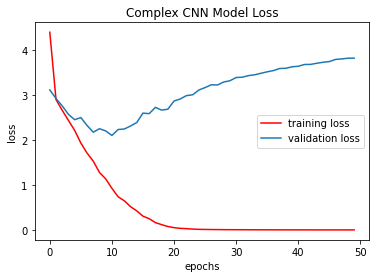

In [ ]:
from matplotlib import pyplot as plt

plt.plot(complex_history.history['accuracy'],'r',label='training accuracy')
plt.plot(complex_history.history['val_accuracy'],label='validation accuracy')
plt.title('Complex CNN Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(complex_history.history['loss'],'r',label='training loss')
plt.plot(complex_history.history['val_loss'],label='validation loss')
plt.title('Complex CNN Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [34]:
complex_cnn_model1=Sequential()

complex_cnn_model1.add(Conv2D(100,(3,3),activation='relu',input_shape=(100,100,3,))) #adding convolution layer 1
complex_cnn_model1.add(MaxPool2D(2,2))                                             #adding pooling layer 

complex_cnn_model1.add(Conv2D(100,(3,3),activation='relu'))                         #adding convolution layer 2
complex_cnn_model1.add(MaxPool2D(2,2))                                             #adding pooling layer

complex_cnn_model1.add(Conv2D(100,(3,3),activation='relu'))                         #adding convolution layer 3
complex_cnn_model1.add(MaxPool2D(2,2))                                             #adding pooling layer


 


complex_cnn_model1.add(Flatten())                                                  #adding FC layer 1
complex_cnn_model1.add(Dense(90,activation='relu'))

complex_cnn_model1.add(Flatten())                                                  #adding FC layer 2                                             
complex_cnn_model1.add(Dense(80,activation='relu'))

complex_cnn_model1.add(Flatten())                                                  #adding FC layer 3
complex_cnn_model1.add(Dense(70,activation='relu'))

complex_cnn_model1.add(Dense(23,activation='softmax'))                             #adding output layer

opt = keras.optimizers.Adam(learning_rate=0.0001)                                 #compiling the model
complex_cnn_model1.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

#fitting the cnn_model
complex_history1=complex_cnn_model1.fit(trainX,trainY,validation_data = (valX, valY),epochs=50,batch_size=30)

Epoch 1/50
72/72 [==============================] - 111s 2s/step - loss: 4.9376 - accuracy: 0.0671 - val_loss: 3.1090 - val_accuracy: 0.1148
Epoch 2/50
72/72 [==============================] - 110s 2s/step - loss: 2.9316 - accuracy: 0.1565 - val_loss: 2.8480 - val_accuracy: 0.2056
Epoch 3/50
72/72 [==============================] - 109s 2s/step - loss: 2.6117 - accuracy: 0.2528 - val_loss: 2.6140 - val_accuracy: 0.2648
Epoch 4/50
72/72 [==============================] - 109s 2s/step - loss: 2.2877 - accuracy: 0.3431 - val_loss: 2.4509 - val_accuracy: 0.2889
Epoch 5/50
72/72 [==============================] - 110s 2s/step - loss: 1.9632 - accuracy: 0.4171 - val_loss: 2.2025 - val_accuracy: 0.3722
Epoch 6/50
72/72 [==============================] - 109s 2s/step - loss: 1.6754 - accuracy: 0.4949 - val_loss: 2.0514 - val_accuracy: 0.4093
Epoch 7/50
72/72 [==============================] - 109s 2s/step - loss: 1.3628 - accuracy: 0.5829 - val_loss: 2.0732 - val_accuracy: 0.3963
Epoch 8/50
72

In [35]:
predLabels1 = complex_cnn_model1.predict(testX, batch_size=32)
predLabels1 = np.argmax(predLabels1, axis=1)
print(classification_report(testY.argmax(axis=1), predLabels1))

              precision    recall  f1-score   support

           0       0.43      0.45      0.44        22
           1       0.29      0.28      0.29        25
           2       0.21      0.19      0.20        26
           3       0.67      0.62      0.64        39
           4       0.36      0.40      0.38        52
           5       0.91      0.95      0.93        22
           6       0.67      0.78      0.72        23
           7       0.73      0.73      0.73        22
           8       0.50      0.45      0.47        20
           9       0.54      0.38      0.45        39
          10       0.52      0.50      0.51        34
          11       0.62      0.67      0.64        24
          12       0.71      0.48      0.57        21
          13       0.79      0.84      0.82        50
          14       0.46      0.48      0.47        27
          15       0.21      0.24      0.22        21
          16       0.61      0.61      0.61        33
          17       0.26    

In [36]:
test_eval=complex_cnn_model1.evaluate(testX,testY)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

22/22 [==============================] - 17s 767ms/step - loss: 3.8189 - accuracy: 0.5037
Test loss: 3.818922996520996
Test accuracy: 0.5037037134170532


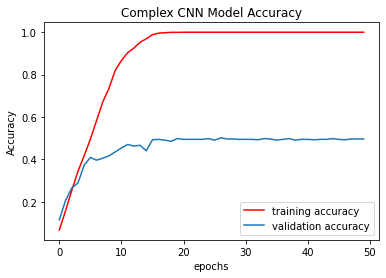

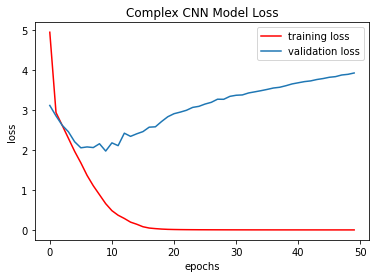

In [37]:
from matplotlib import pyplot as plt

plt.plot(complex_history1.history['accuracy'],'r',label='training accuracy')
plt.plot(complex_history1.history['val_accuracy'],label='validation accuracy')
plt.title('Complex CNN Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(complex_history1.history['loss'],'r',label='training loss')
plt.plot(complex_history1.history['val_loss'],label='validation loss')
plt.title('Complex CNN Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
complex_cnn_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 68, 68, 100)       2800      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 34, 34, 100)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 100)       90100     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 100)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 100)       90100     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 100)       

**CNN with Regularisation**

In [30]:
cnn_regularization=Sequential()

cnn_regularization.add(Conv2D(100,(3,3),activation='relu',input_shape=(100,100,3,))) #adding convolution layer 1
cnn_regularization.add(MaxPool2D(2,2))                                             #adding pooling layer 

cnn_regularization.add(Conv2D(100,(3,3),activation='relu'))                         #adding convolution layer 2
cnn_regularization.add(MaxPool2D(2,2))                                             #adding pooling layer

cnn_regularization.add(Conv2D(100,(3,3),activation='relu'))                         #adding convolution layer 3
cnn_regularization.add(MaxPool2D(2,2))                                             #adding pooling layer
 
cnn_regularization.add(Flatten())                                                  #adding FC layer 1
cnn_regularization.add(Dense(90,activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))

cnn_regularization.add(Flatten())                                                  #adding FC layer 2                                             
cnn_regularization.add(Dense(80,activation='relu'))

cnn_regularization.add(Flatten())                                                  #adding FC layer 3
cnn_regularization.add(Dense(70,activation='relu'))

cnn_regularization.add(Dense(23,activation='softmax'))                             #adding output layer

opt = keras.optimizers.Adam(learning_rate=0.0001)                                 #compiling the model
cnn_regularization.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

#fitting the cnn_model
cnn_reg_history=cnn_regularization.fit(trainX,trainY,validation_data = (valX, valY),epochs=50,batch_size=30)

Epoch 1/50
72/72 [==============================] - 110s 2s/step - loss: 5.2791 - accuracy: 0.0894 - val_loss: 4.2720 - val_accuracy: 0.1574
Epoch 2/50
72/72 [==============================] - 109s 2s/step - loss: 3.8617 - accuracy: 0.2176 - val_loss: 3.6585 - val_accuracy: 0.3019
Epoch 3/50
72/72 [==============================] - 109s 2s/step - loss: 3.3334 - accuracy: 0.3593 - val_loss: 3.3744 - val_accuracy: 0.2981
Epoch 4/50
72/72 [==============================] - 109s 2s/step - loss: 2.9294 - accuracy: 0.4597 - val_loss: 3.0682 - val_accuracy: 0.4037
Epoch 5/50
72/72 [==============================] - 109s 2s/step - loss: 2.5493 - accuracy: 0.5690 - val_loss: 2.9181 - val_accuracy: 0.4685
Epoch 6/50
72/72 [==============================] - 110s 2s/step - loss: 2.2352 - accuracy: 0.6440 - val_loss: 2.9113 - val_accuracy: 0.4648
Epoch 7/50
72/72 [==============================] - 109s 2s/step - loss: 1.9646 - accuracy: 0.7231 - val_loss: 2.7656 - val_accuracy: 0.4981
Epoch 8/50
72

In [32]:
test_eval=cnn_regularization.evaluate(testX,testY)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

22/22 [==============================] - 9s 395ms/step - loss: 2.7675 - accuracy: 0.5852
Test loss: 2.7674546241760254
Test accuracy: 0.585185170173645


In [31]:
predLabels_reg = cnn_regularization.predict(testX, batch_size=32)
predLabels_reg = np.argmax(predLabels_reg, axis=1)
print(classification_report(testY.argmax(axis=1), predLabels_reg))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69        22
           1       0.43      0.52      0.47        25
           2       0.41      0.35      0.38        26
           3       0.82      0.79      0.81        39
           4       0.39      0.44      0.41        52
           5       0.91      0.91      0.91        22
           6       0.61      0.83      0.70        23
           7       0.76      0.59      0.67        22
           8       0.73      0.80      0.76        20
           9       0.56      0.62      0.59        39
          10       0.47      0.44      0.45        34
          11       0.60      0.50      0.55        24
          12       0.61      0.67      0.64        21
          13       0.90      0.88      0.89        50
          14       0.62      0.56      0.59        27
          15       0.21      0.19      0.20        21
          16       0.72      0.64      0.68        33
          17       0.41    

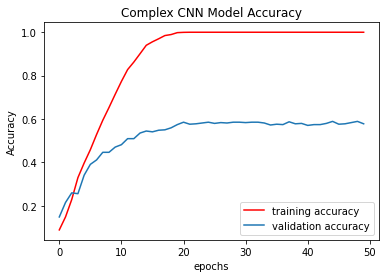

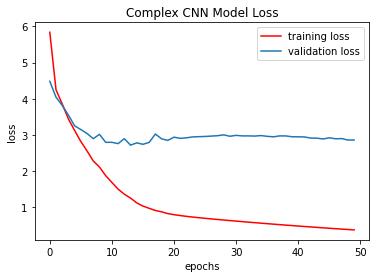

In [ ]:
from matplotlib import pyplot as plt

plt.plot(cnn_reg_history.history['accuracy'],'r',label='training accuracy')
plt.plot(cnn_reg_history.history['val_accuracy'],label='validation accuracy')
plt.title('Complex CNN Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(cnn_reg_history.history['loss'],'r',label='training loss')
plt.plot(cnn_reg_history.history['val_loss'],label='validation loss')
plt.title('Complex CNN Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()